#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q1.	Read the dataset and understand the features and target variable.

In [372]:
#Enable graph plotting in Jupyter
%matplotlib inline
# Numerical libraries
import numpy as np  
# to handle data in form of rows and columns 
import pandas as pd   

import matplotlib.pyplot as plt 
import matplotlib.style

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from scipy.stats import zscore

In [373]:
data = pd.read_csv('Qualitative_Bankruptcy.data.txt', header = None, 
names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])
data.head(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


#### This is the data from Qualitative_Bankruptcy database with 6 categorical attributes which assess each datapoint based on three potential values : "Positive", "Negative" and "Average"

##### Printing Datatypes:

In [374]:
DT=data.dtypes.to_frame(name='Datatypes')
DT.reset_index(level=None, drop=False, inplace=True)
DT.rename(columns ={'index':'Columns'},inplace=True)
DT

,Columns,Datatypes
0,Industrial Risk,object
1,Management Risk,object
2,Financial Flexibility,object
3,Credibility,object
4,Competitiveness,object
5,Operating Risk,object
6,Class,object


In [375]:
print('Number of features (including the Target):',data.shape[1], '& Number of datapoints:', data.shape[0])

Number of features (including the Target): 7 & Number of datapoints: 250


##### Data Distribution

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFA8A1E708>],
      dtype=object)

<Figure size 80x80 with 0 Axes>

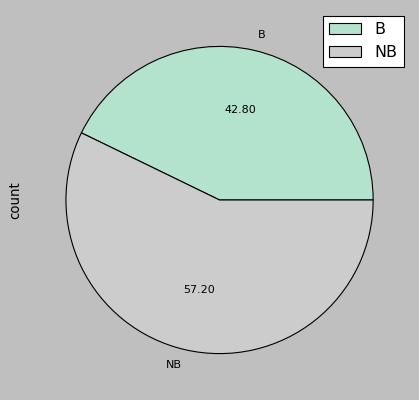

In [376]:
Target='Class'
plt.style.use('classic')
plt.figure(figsize = (1,1))
cols= pd.crosstab(index=data[Target],columns="count")
cols.plot(kind='pie',subplots=True,legend=True,fontsize=10,autopct='%.2f',colormap ='Pastel2')

##### 42 % of the data falls under Bankruptcy and rest 57% into Non-Bankruptcy. The data is balanced

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q2.	Encode independent features.

##### The values can be Positive, Negative and Average, which is in an ordered fashion. So, I would assign an ordered number to labels : "P", "A", "N" 

In [377]:
temp_dict={'N': 0, 'A':1, 'P':2}
data_original=data
col_list=data.columns.tolist()
col_list.remove('Class')
for col in col_list:
    data[col]=data[col].map(temp_dict)
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,1,1,1,2,NB
1,0,0,1,1,1,0,NB
2,1,1,1,1,1,1,NB
3,2,2,2,2,2,2,NB
4,0,0,2,2,2,0,NB
...,...,...,...,...,...,...,...
245,0,0,1,0,0,0,B
246,2,0,0,0,0,0,B
247,1,0,0,0,0,0,B
248,0,0,0,0,0,0,B


##### PCA is capturing the covariance between independent variables. Let us check the correlation . We can also use the Pair Plot to capture the same. However, since all these are categorical variable with discrete values, I am plotting the heatmap rather, to understand the relation between them.

<Figure size 800x800 with 0 Axes>

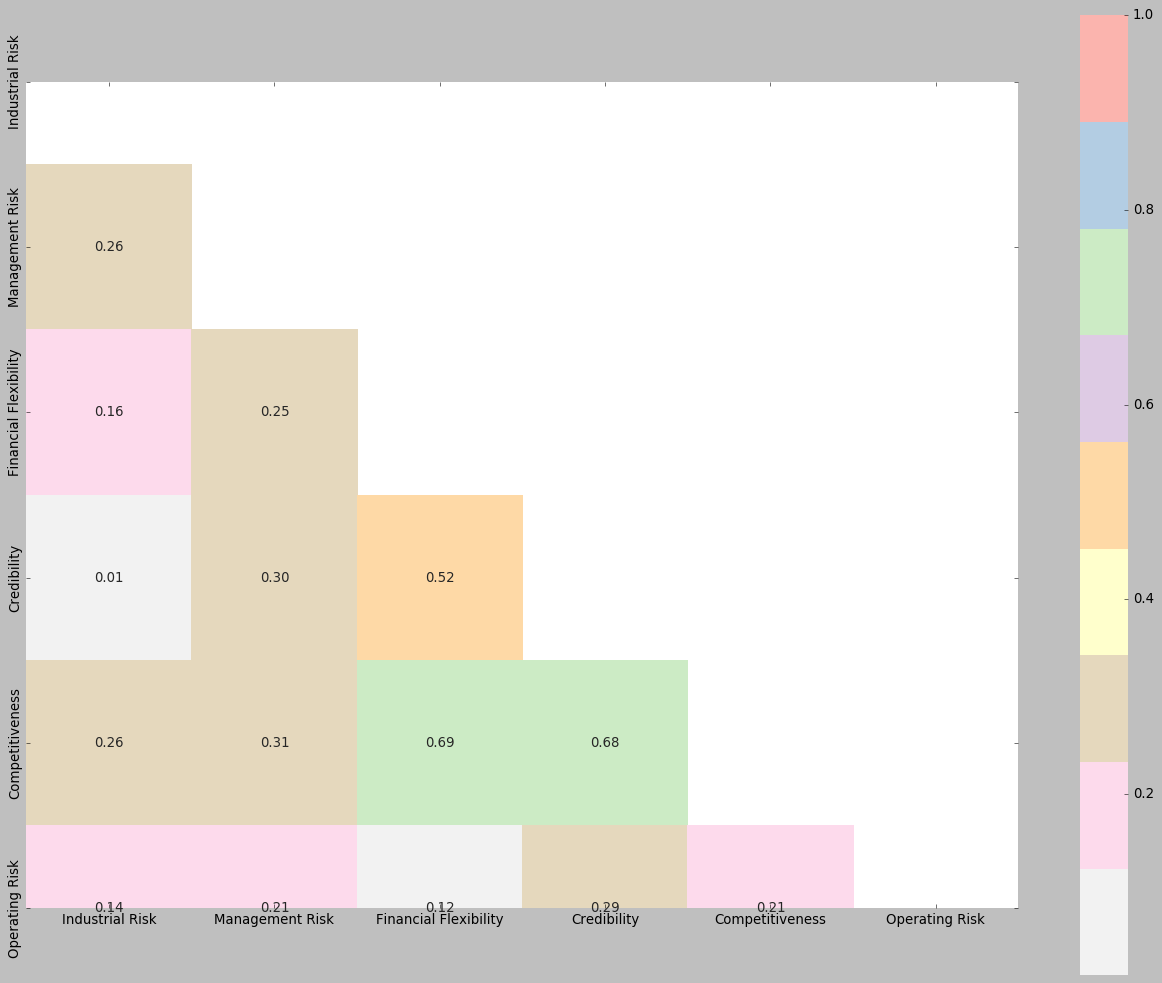

In [378]:
import pylab as pl
pl.figure(figsize = (10,10))

corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, mask=mask,annot=True,square=True, fmt='0.2f',cmap='Pastel1_r')

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q3.	Separate the dependant variable from the rest of the train data 

In [379]:
X1 = data[data.columns[0:-1]]
y1 = data["Class"]

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q4.Split the dataset into training and test data ( Take 80:20 ratio). 

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((200, 6), (50, 6), (200,), (50,))

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q5.Apply PCA on the independent features of train data. 

##### I am skipping the scaling, as all the attributes are categorical and z-score or any other scaling method will not have any impact other than assigning new labels. Categorical data here is unit less and can be proceeded with PCA steps.

##### Covariance Matrix

In [381]:
train_cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', train_cov_matrix) 

Covariance Matrix 
%s [[0.65404523 0.18532663 0.13572864 0.03125628 0.22188442 0.13351759]
 [0.18532663 0.67577889 0.16060302 0.20663317 0.20542714 0.14432161]
 [0.13572864 0.16060302 0.66040201 0.3479397  0.49251256 0.06      ]
 [0.03125628 0.20663317 0.3479397  0.68984925 0.47849246 0.19939698]
 [0.22188442 0.20542714 0.49251256 0.47849246 0.76459799 0.13854271]
 [0.13351759 0.14432161 0.06       0.19939698 0.13854271 0.75165829]]


##### EigenValues and EigenVectors:

In [382]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.24945874  0.25616152 -0.2645557   0.42382946 -0.42994993 -0.661569  ]
 [ 0.31945349 -0.08763221  0.12806799  0.34445058  0.82305912 -0.27891959]
 [ 0.46224373  0.37368037  0.70861061 -0.3416026  -0.13850929 -0.09320704]
 [ 0.48230608  0.47819791 -0.58142691 -0.19642015  0.16137513  0.36881912]
 [ 0.56840784 -0.74466952 -0.14305741 -0.25031485 -0.19088293 -0.05310923]
 [ 0.2575731  -0.06212019  0.23012432  0.69555133 -0.23675663  0.58051238]]

 Eigen Values 
%s [1.84674521 0.16958734 0.27331876 0.76885229 0.50329753 0.63453052]


##### Sort eigenvalues in descending order and Make a set of (eigenvalue, eigenvector) pairs

In [383]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.8467452108166929, array([0.24945874, 0.31945349, 0.46224373, 0.48230608, 0.56840784,
       0.2575731 ])), (0.7688522896209736, array([ 0.42382946,  0.34445058, -0.3416026 , -0.19642015, -0.25031485,
        0.69555133])), (0.6345305235614778, array([-0.661569  , -0.27891959, -0.09320704,  0.36881912, -0.05310923,
        0.58051238])), (0.5032975305916022, array([-0.42994993,  0.82305912, -0.13850929,  0.16137513, -0.19088293,
       -0.23675663])), (0.2733187617417952, array([-0.2645557 ,  0.12806799,  0.70861061, -0.58142691, -0.14305741,
        0.23012432])), (0.1695873419589173, array([ 0.25616152, -0.08763221,  0.37368037,  0.47819791, -0.74466952,
       -0.06212019]))]
Eigenvalues in descending order: 
[1.8467452108166929, 0.7688522896209736, 0.6345305235614778, 0.5032975305916022, 0.2733187617417952, 0.1695873419589173]


##### Find out cumulative variance

In [384]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 6 entries as there are 6 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
cum_var_exp

array([0.44008562, 0.62330571, 0.77451648, 0.89445398, 0.95958676,
       1.        ])

##### The above means PC1 contributes 44% of information in the dataset, PC1 & PC2 combinely contributes to 62% of information, PC1, PC2 & PC3 contributes 77% and so on

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q6.Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 

##### The below plot shows that PC5 covers untill 95% approx. of the information in the dataset. I choose to drop the last dimension and reduce the 6D space into 5D

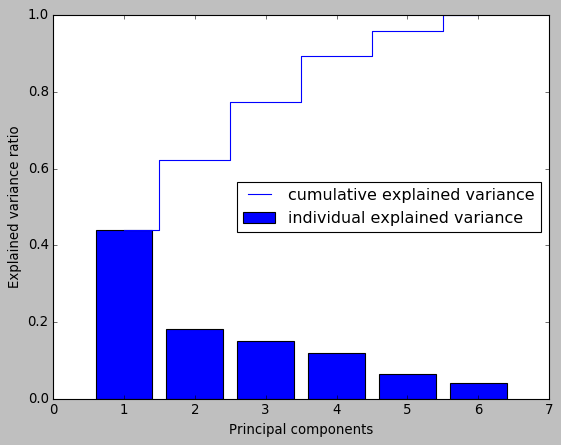

In [385]:
plt.bar(range(1,7), var_explained, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q7.Transform the data using PCA ( select optimum number of PCs). 

##### Apply PCA on the training dataset

In [386]:
from sklearn.decomposition import PCA
datapca=PCA(n_components=5)
df_reduced_1=datapca.fit_transform(X_train)

Proj_data_df_train = pd.DataFrame(df_reduced_1)
Proj_data_df_train

,0,1,2,3,4
0,-1.477113,-0.172890,-0.851862,0.513736,0.056601
1,-0.144605,-0.718912,0.481864,-1.164602,0.010535
2,0.979890,2.172066,0.533632,-0.215407,-0.048140
3,-1.306146,0.096259,1.037958,0.045245,0.271416
4,-1.157660,-0.517340,-1.130782,1.336795,-0.071467
...,...,...,...,...,...
195,1.618797,1.483164,-0.024207,1.430711,-0.304276
196,1.831101,-0.607567,-0.276220,-0.887137,-0.688772
197,0.943240,-0.513431,0.055809,-1.519313,-0.703761
198,-1.538994,-0.523990,0.007570,-0.546080,-0.045456


##### Apply PCA on the test dataset

In [387]:
from sklearn.decomposition import PCA
datapca=PCA(n_components=5)
df_reduced_1=datapca.fit_transform(X_test)

Proj_data_df_test = pd.DataFrame(df_reduced_1)
Proj_data_df_test.head()

,0,1,2,3,4
0,0.146547,-0.877722,-0.830331,-0.081229,0.838197
1,-0.933950,-0.795738,0.323849,-0.943277,-0.013950
2,-1.220098,-0.563960,0.143952,1.582204,0.042754
3,-1.882468,0.114769,-0.165689,-0.146415,-0.077997
4,1.751392,-0.670610,0.503437,-0.846430,0.396486


##### Let us check accuracy score on the transformed data

In [388]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression()
regression_model.fit(Proj_data_df_train, y_train)

regression_model.coef_

C:\Users\sense\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 3.44123073,  1.12195756, -0.00994599, -0.51924612,  0.20482186]])

##### Training Score:

In [389]:
regression_model.score(Proj_data_df_train, y_train)

0.995

##### Testing Score:

In [390]:
regression_model.score(Proj_data_df_test, y_test)

0.98

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q8.Apply KMeans algorithm on the above transformed data. 

##### First step would be finding optimal no. of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

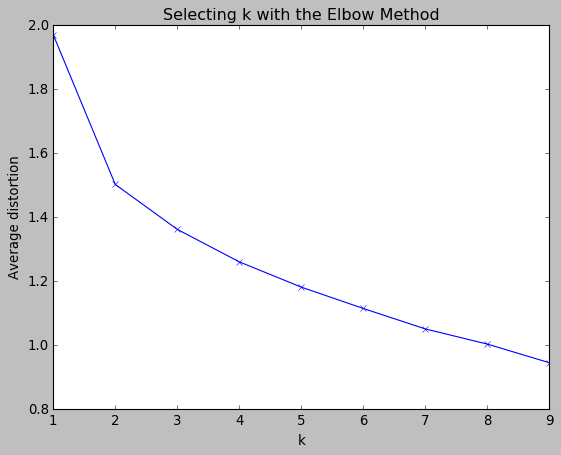

In [391]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Proj_data_df_train)
    prediction=model.predict(Proj_data_df_train)
    meanDistortions.append(sum(np.min(cdist(Proj_data_df_train, model.cluster_centers_, 'euclidean'), axis=1)) / Proj_data_df_train.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q9.Select optimal number of clusters and form clusters out of the train data. 

##### Lets start with  k=2 as the sharp decrease fades away after that.

##### Also please note that in clustering train and test data split is not necessary. As per the question, I am using the train data split

In [392]:
final_model=KMeans(2)
final_model.fit(Proj_data_df_train)
prediction=final_model.predict(Proj_data_df_train)

##### I have done further iterations with different k values. Please check below.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q10.Create a new column in the train data and populate it with the cluster labels. 

In [393]:
#Append the prediction 
#Proj_data_df_pca["Class"] = y1
Proj_data_df_train["ClusterLabel"] = prediction
print("Class Assigned : \n")
Proj_data_df_train[["ClusterLabel"]]

Class Assigned : 



,ClusterLabel
0,0
1,0
2,1
3,0
4,0
...,...
195,1
196,1
197,1
198,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFA9BD8B08>,
      dtype=object)

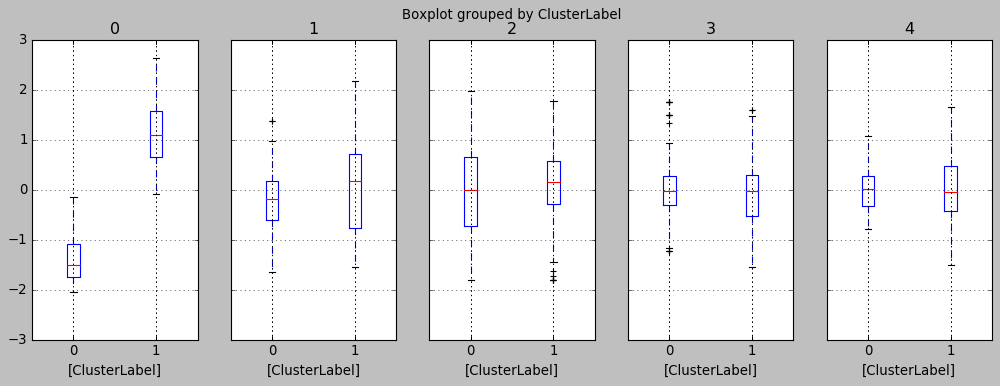

In [394]:
Proj_data_df_train.boxplot(by='ClusterLabel', layout=(1,5), figsize=(15,5))

##### KMeans with k=2 has outliers. Outlier can impact clustering. So we try with k=3

Class Assigned : 



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFA9DB5AC8>,
      dtype=object)

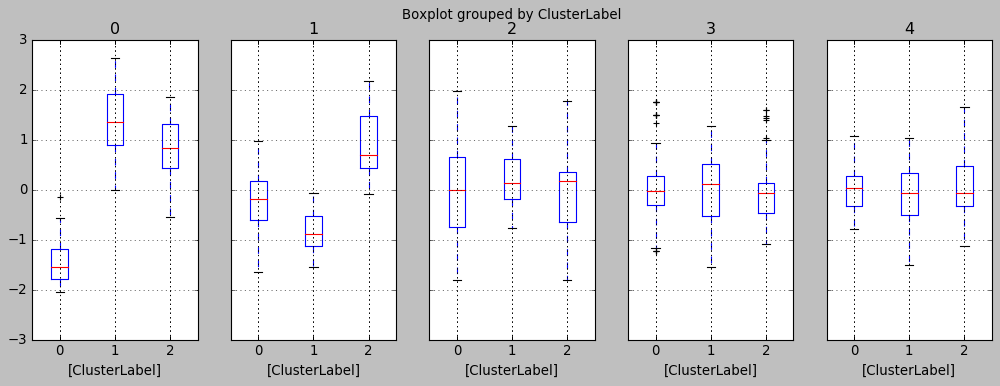

In [395]:
final_model=KMeans(3)
final_model.fit(Proj_data_df_train)
prediction=final_model.predict(Proj_data_df_train)
#Append the prediction 
#Proj_data_df_pca["Class"] = y1
Proj_data_df_train["ClusterLabel"] = prediction
print("Class Assigned : \n")
Proj_data_df_train[["ClusterLabel"]]
Proj_data_df_train.boxplot(by='ClusterLabel', layout=(1,5), figsize=(15,5))

##### K=4. 

Class Assigned : 



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFAA34AB08>,
      dtype=object)

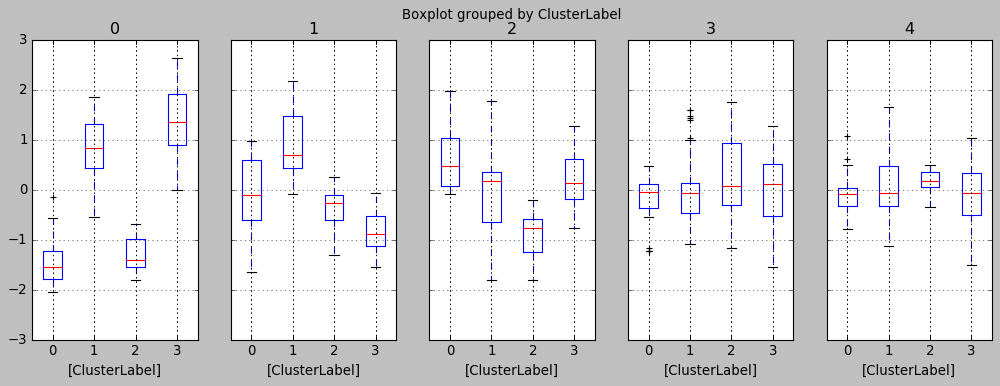

In [396]:
final_model=KMeans(4)
final_model.fit(Proj_data_df_train)
prediction=final_model.predict(Proj_data_df_train)
#Append the prediction 
#Proj_data_df_pca["Class"] = y1
Proj_data_df_train["ClusterLabel"] = prediction
print("Class Assigned : \n")
Proj_data_df_train[["ClusterLabel"]]
Proj_data_df_train.boxplot(by='ClusterLabel', layout=(1,5), figsize=(15,5))

##### As k=24 looks like the most optimal value (Number of outliers reduced), we will proceed with that.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q11.Transform the test data using the same PCA object that was fit on the train data. 

In [397]:
from sklearn.decomposition import PCA
datapca=PCA(n_components=5)
df_reduced_1=datapca.fit_transform(X_test)

Proj_data_df_test = pd.DataFrame(df_reduced_1)
Proj_data_df_test.head()

,0,1,2,3,4
0,0.146547,-0.877722,-0.830331,-0.081229,0.838197
1,-0.933950,-0.795738,0.323849,-0.943277,-0.013950
2,-1.220098,-0.563960,0.143952,1.582204,0.042754
3,-1.882468,0.114769,-0.165689,-0.146415,-0.077997
4,1.751392,-0.670610,0.503437,-0.846430,0.396486


#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q12.Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 

In [398]:
final_model.fit(Proj_data_df_test)
prediction=final_model.predict(Proj_data_df_test)
#Append the prediction 
#Proj_data_df_pca["Class"] = y1
Proj_data_df_test["ClusterLabel"] = prediction
print("Class Assigned : \n")
Proj_data_df_test[["ClusterLabel"]]

Class Assigned : 



,ClusterLabel
0,3
1,2
2,2
3,2
4,3
5,2
6,0
7,1
8,1
9,0


#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q13.Apply SVC model on train dataset and predict target for test dataset. 

In [399]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=2)    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface

clf.fit(Proj_data_df_train , y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [400]:
y_pred = clf.predict(Proj_data_df_test)

In [401]:
y_train=y_train.reset_index()
y_train=y_train.drop('index',axis=1)
y_test=y_test.reset_index()
y_test=y_test.drop('index',axis=1)

##### Training Score

In [402]:
clf.score(Proj_data_df_train, y_train)

0.99

##### Testing Score

In [403]:
clf.score(Proj_data_df_test, y_test)

0.98

#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Q14.Check accuracy and confusion matrix. 

In [404]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet['Class'][x]== predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

##### Accuracy:

In [405]:
getAccuracy(y_test , y_pred)

98.0

##### Confusion Matrix:

<Figure size 640x480 with 0 Axes>

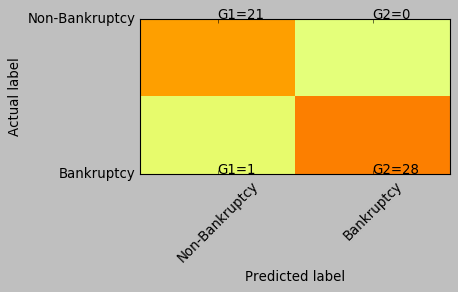

In [406]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non-Bankruptcy','Bankruptcy']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()